We've covered simple linear regression, but that model is rather limited. It's extremely basic, dealing with only one outcome variable and one input. Most of the time we're interested in a relationship between more than two variables. So what can least squares regression do in that circumstance?

The answer is it can still do quite a lot. Least squares regression can handle almost any functional form you pass into it, it will simply estimate the coefficients.

## Multivariable Least Squares

When a least squares regression has more than one independent variable (or input) it is called multivariable least squares linear regression, multiple linear regression, or just multivariable regression. [Note that this is different from "multivariate" regression, which involves more than one _dependent_ variable.]

This type of model is used when there are multiple variables affecting your outcome. For example, let's think about rental costs. If we wanted to model the monthly rental cost of an apartment there are several factors that matter. We could do something simple, say:

$$ Rent = \alpha + SquareFootage $$

And that might not be a terrible model. It makes sense that as square footage of an apartment goes up so would the cost of rent. However, there's probably more to the story than that.

$$ Rent = \alpha + SquareFootage + Bedrooms + Bathrooms + YearBuilt $$

This would seem like a much more robust model. Now all of these relationships are still linear, meaning each additional bedroom affects rent in the same way. The delta to rent will be equivalent for moving from 1 to 2 bedrooms and from 11 to 12. Again, this is the nature of linear regression. As with the simpler models, here again the linear regression algorithm arrives at estimates for coefficients in front of each variable that minimize the sum of squared errors. We'll cover how that algorithm functions in more detail later.

## Categorical Variables

Not all variables have an obvious linear relationship, however. Categorical variables, for one, pose a unique problem here. A __categorical variable__, much like the outcomes we studied when working with classifiers, is a type or category. This can be something like a boolean {True, False} or state {WA, CA, OR, NV...}. Implying a single linear relationship between all of these values wouldn't make sense. Instead we treat each of them individually, allowing for each value to have its own associated coefficient. So if we wanted to include neighborhood in our example model we could do something like:

$$ Rent = \alpha + SquareFootage + Bedrooms + Bathrooms + YearBuilt + Neighborhood $$

In some languages, such as R, this is functionally sufficient and the algorithm will break neighborhood into categories for the various neighborhoods passed into the model. For Python, however, we have to do a little more work. Because these different categories are not linearly related, SKLearn wants separate binary __indicators__ for each. So for every categorical value we have to create a column that is 0 or 1 indicating if the observation is of that category.

To continue with our rent example, let's say our town was broken into three neighborhoods: Downtown, South, and North. Then our specification would look something like:

$$ Rent = \alpha + SquareFootage + Bedrooms + Bathrooms + YearBuilt + Downtown + South $$

There are a few things to note here. Firstly, one category will always be excluded. That's because it will be incorporated into the intercept (the $\alpha$) and we would otherwise run into collinearity problems, which we'll cover more in the next section. Also, each of these categories would typically be mutually exclusive, which makes sense. If a house is in the South, it shouldn't simultaneously be in the North.

Python offers you two real ways to deal with creating these indicators. The first is to do it manually. If this seems hard or complicated to you THEN YOU SHOULD ABSOLUTELY DO IT! It's good programming practice. However, SKLearn (of course) has a [built in function](http://scikit-learn.org/stable/modules/preprocessing.html) called `OneHotEncoder` that will also do this kind of data preparation.

## Linear doesn't have to mean lines...

Now it is worth noting that the model assumes a linear relationship between the predictors and the outcome, but the predictors themselves can take on more complicated forms. For example, if you specified a functional form of:

$$ y = \alpha + x + x^2 $$

That is perfectly doable in multivariable regression as long as you pass through a dataframe where one column is $x$ and the other column is $x^2$. It is not uncommon to see things like sine or cosine when dealing with a seasonal time series. You can get as complicated as you want, though be careful. Adding a lot of terms can destroy your model by violating the assumptions of OLS. We'll get into those assumptions in the next lesson.

## DRILL: Prepare the Data

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Grab and process the raw data.
data_path = ("new_york_crime.csv"
            )
crime_raw = pd.read_csv(data_path, delimiter= ',', header=0)
crime_raw = crime_raw.fillna('0')
crime_raw.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,0,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,0,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,0,30,227,526,"4,090",705,"3,243",142,0
4,Albion Village,"6,388",23,0.000,0,3,4,16,223,53,165,5,0


In [3]:
crime_raw.City = crime_raw.City.apply(lambda x: x.lower())

crime_raw.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,adams village,"1,861",0,0.000,0,0,0,0,12,2,10,0,0.000
1,addison town and village,"2,577",3,0.000,0,0,0,3,24,3,20,1,0.000
2,akron village,"2,846",3,0.000,0,0,0,3,16,1,15,0,0.000
3,albany,"97,956",791,8.000,0,30,227,526,"4,090",705,"3,243",142,0
4,albion village,"6,388",23,0.000,0,3,4,16,223,53,165,5,0


In [4]:
#crime_raw.Population = crime_raw.Population.apply(lambda x: x.translate(None, string.punctuation))

crime_raw.dtypes

City                                      object
Population                                object
Violent\ncrime                            object
Murder and\nnonnegligent\nmanslaughter    object
Rape\n(revised\ndefinition)1              object
Rape\n(legacy\ndefinition)2               object
Robbery                                   object
Aggravated\nassault                       object
Property\ncrime                           object
Burglary                                  object
Larceny-\ntheft                           object
Motor\nvehicle\ntheft                     object
Arson3                                    object
dtype: object

In [65]:
#Clean punctuation for Population
#crime_raw['Population'] = crime_raw['Population'].str.replace(r'[^\w\s]+', '')

# Convert all objects to integers

cols = crime_raw.columns[crime_raw.dtypes.eq('object')]

crime_raw[cols] = crime_raw[cols].apply(pd.to_numeric, errors='coerce')

crime_raw.dtypes

City                                      float64
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1                int64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

In [66]:
mean_pop = crime_raw['Population'].mean(skipna=True)
print (mean_pop)

40034.707380621905


In [59]:
#crime_raw['Population']=crime_raw.Population.mask(crime_raw.Population == 0,mean_pop)


In [67]:
features = pd.get_dummies(crime_raw['City'])

features['robbery'] = np.where(crime_raw['Robbery']<1, 0, 1)

# Check to make sure it worked.
print(crime_raw['Robbery'].groupby(features['robbery']).describe())


          count   mean    std   min   25%   50%    75%     max
robbery                                                       
0       142.000  0.000  0.000 0.000 0.000 0.000  0.000   0.000
1       207.000 23.565 81.520 1.000 1.000 3.000 12.000 918.000


In [68]:
features['murder'] = np.where(crime_raw['Murder and\nnonnegligent\nmanslaughter']<1, 0, 1)

# Check to make sure it worked.
print(crime_raw['Murder and\nnonnegligent\nmanslaughter'].groupby(features['murder']).describe())


         count   mean    std   min   25%   50%   75%     max
murder                                                      
0      302.000  0.000  0.000 0.000 0.000 0.000 0.000   0.000
1       49.000 11.122 48.098 1.000 1.000 1.000 3.000 335.000


In [73]:
features['population'] = crime_raw['Population'] 

features['population'] = features.population.round()
features['population'] = features.population.astype(int)
features['population'].unique()

array([   1861,    2577,    2846,   97956,    6388,    4089,    1781,
        118296,    9519,   18182,    2053,    4523,     658,    2522,
         27270,    3333,    7473,    5418,   15374,    5733,   17627,
         34243,   46304,    1410,   12001,    1022,    2325,    2054,
          2065,    2358,    7976,   36689,    8284,    6390,    1174,
        258789,    6577,    1854,    2219,   24165,   10470,    4704,
          2246,    6794,     762,   34462,    3481,    3862,     980,
          3749,    2732,    1835,    1733,   78361,    7990,    5016,
         29571,   80705,    2049,    4503,    7458,   16179,   78215,
          1827,   11087,    2978,    9543,   19331,    9264,    8180,
          3209,    4605,    7827,    2985,   15189,    1628,   22681,
          1122,   11021,    2191,    1913,   12329,   13774,   19800,
         29315,   16470,   19674,    1104,    6596,    3036,    7684,
          4124,    5144,   28921,    4079,    5948,   13122,   16292,
          5335,   12

In [89]:
features['population_squared'] = crime_raw['Population'] * crime_raw['Population']

features['population_squared'] = np.where(
    features['population_squared'] >0, 
    features['population_squared'],
    mean_pop*mean_pop)

features['population_squared'] = features['population_squared'].values.astype('int64')
features['population_squared'].describe()

count              351.000
mean      201828335372.353
std      3762691577605.513
min             276676.000
25%            9063112.500
50%           54922921.000
75%          373436342.500
max     70494931807876.000
Name: population_squared, dtype: float64

In [78]:
features.describe()

,robbery,murder,population,population_squared
count,351.000,351.000,351.000,351.000
mean,0.595,0.140,40034.704,201828335372.359
std,0.492,0.347,448104.486,3762691577605.513
min,0.000,0.000,526.000,276676.000
25%,0.000,0.000,3010.500,9063112.500
50%,1.000,0.000,7411.000,54922921.000
75%,1.000,0.000,19324.500,373436342.500
max,1.000,1.000,8396126.000,70494931807876.000


### Now that the data is cleaned and my features are made I want to take a look at some of the plots to explore my data. First is a scatterplot matrix.

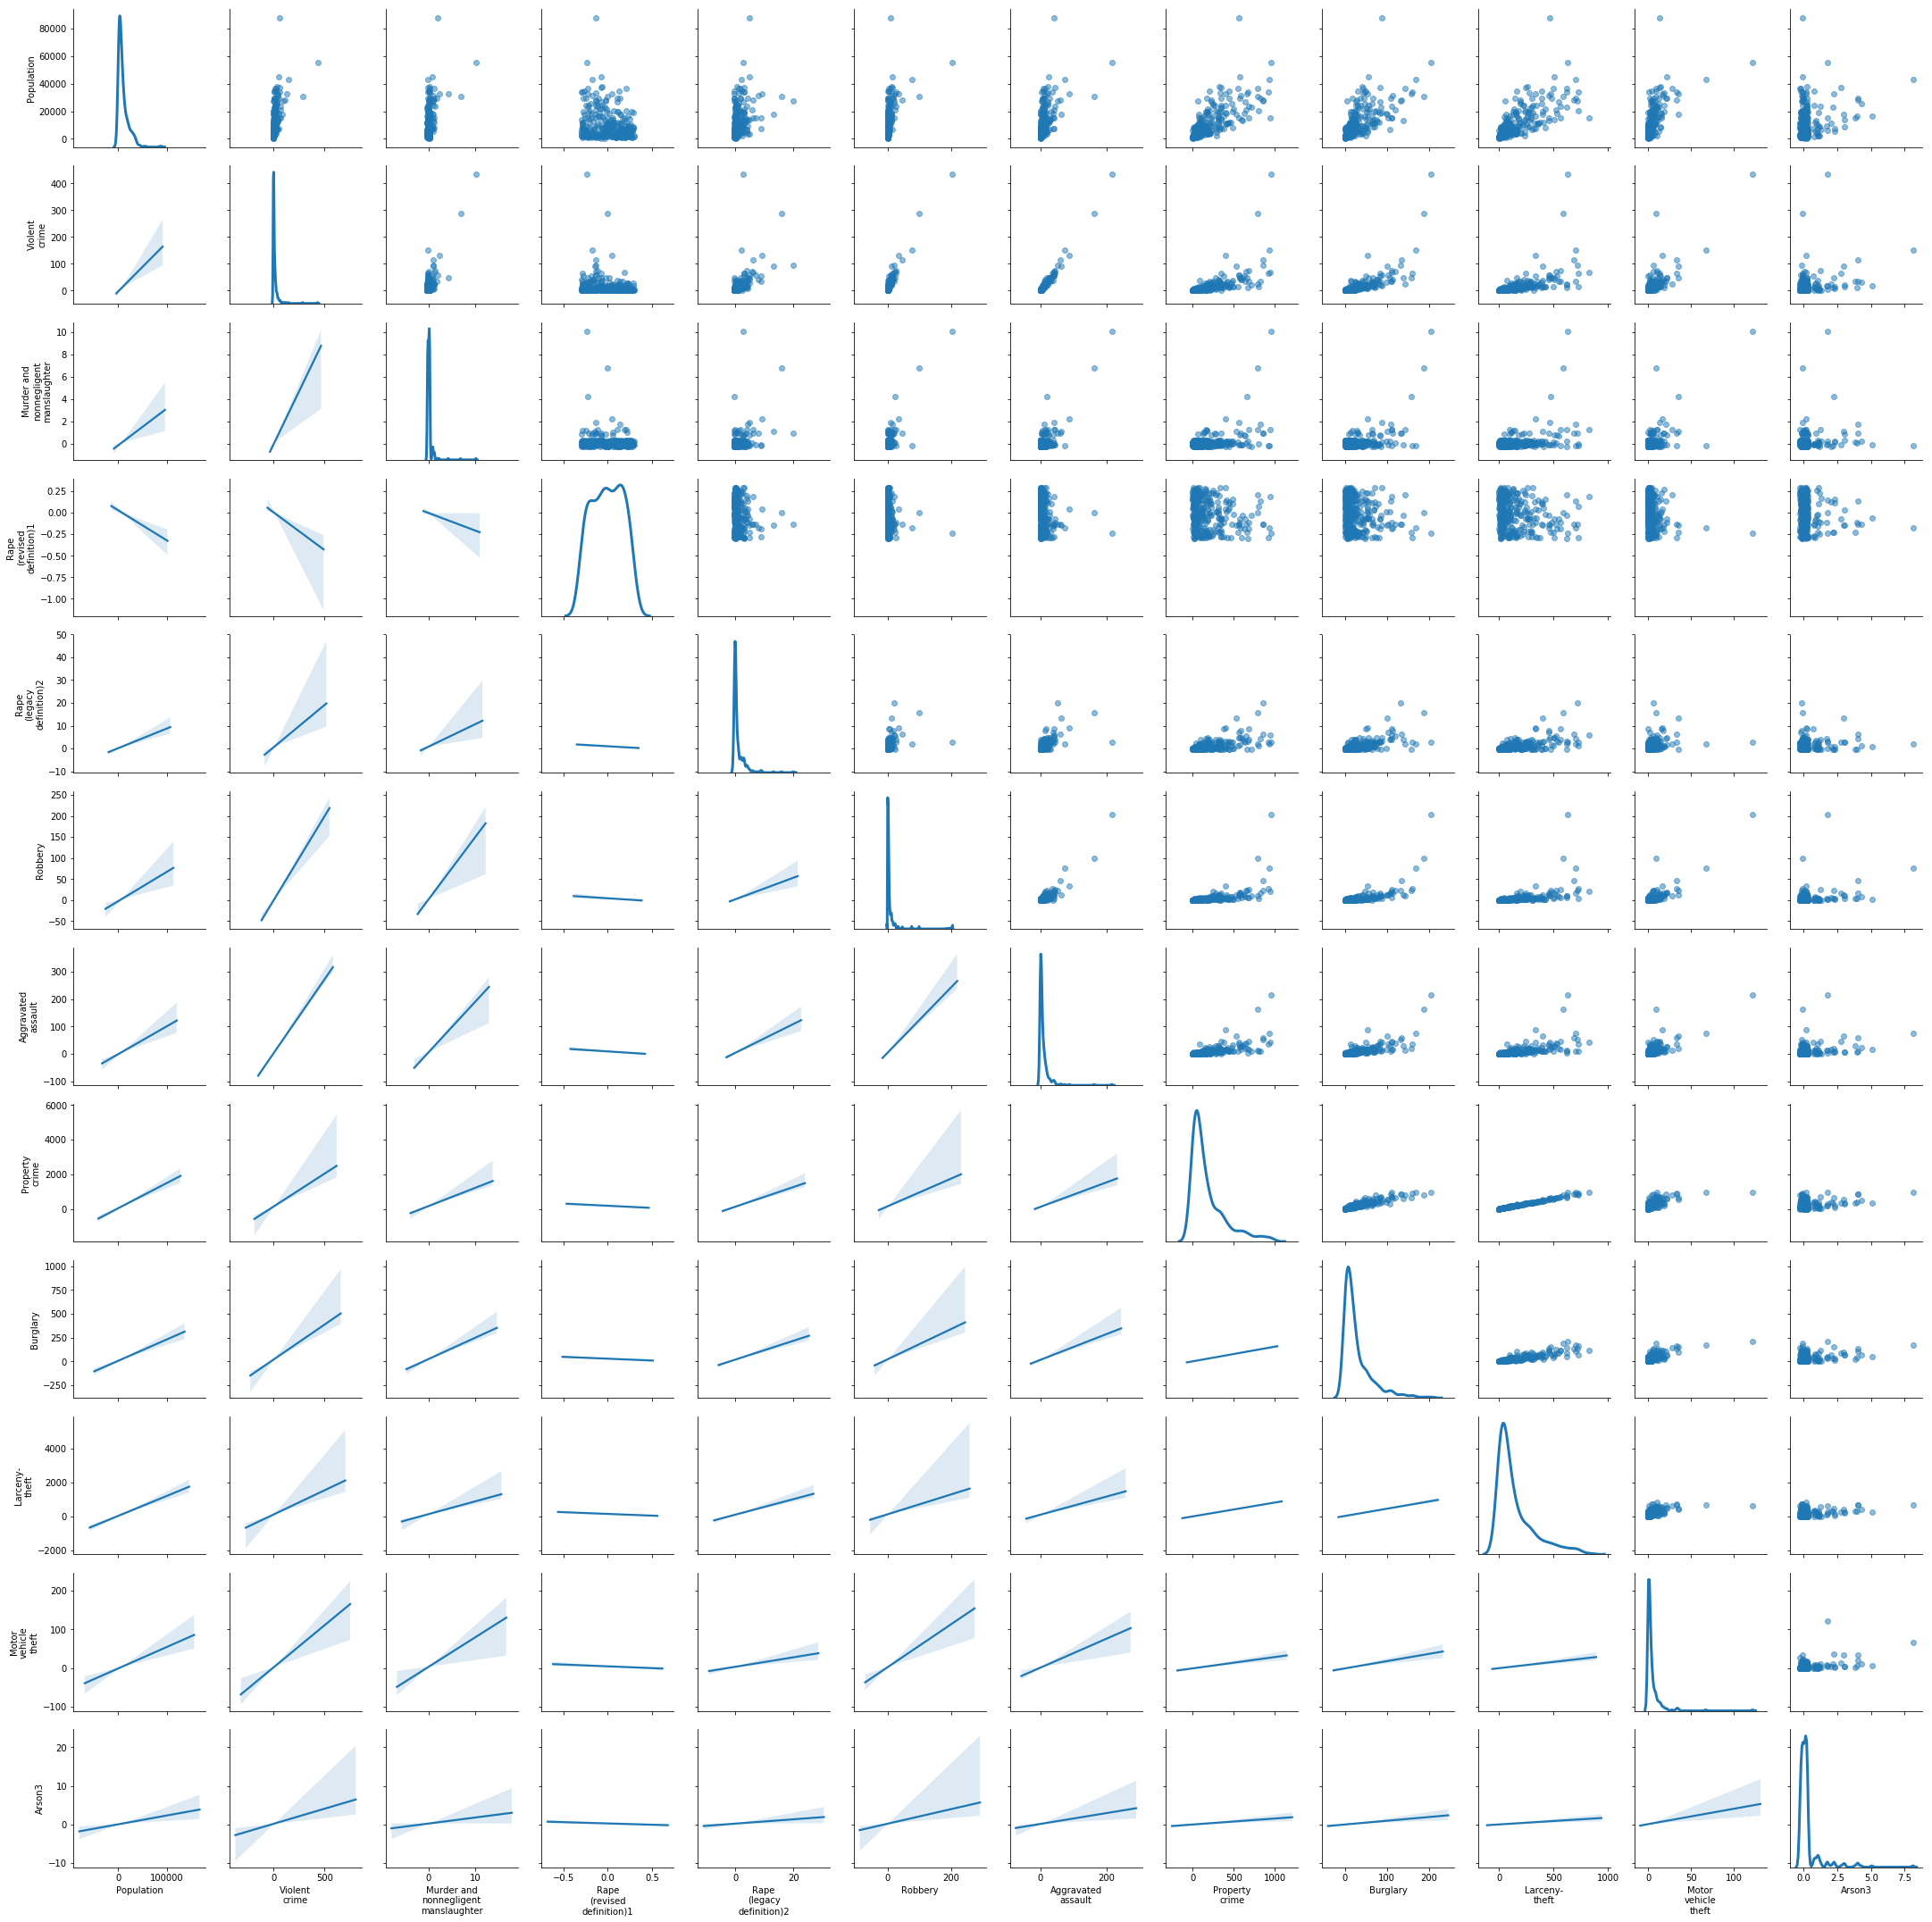

In [13]:
# Make a copy of the data to add jitter to and plot.
df_jittered = crime_raw.loc[:, 'Population':'Arson3'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

### Now let's look at the correlation matrix for the entire dataset. 

                                        City  Population  Violent\ncrime  \
City                                     nan         nan             nan   
Population                               nan       1.000           0.614   
Violent\ncrime                           nan       0.614           1.000   
Murder and\nnonnegligent\nmanslaughter   nan       0.987           0.802   
Rape\n(revised\ndefinition)1             nan         nan             nan   
Rape\n(legacy\ndefinition)2              nan       0.792           0.810   
Robbery                                  nan       0.772           0.977   
Aggravated\nassault                      nan       0.736           0.994   
Property\ncrime                          nan       0.705           0.628   
Burglary                                 nan       0.702           0.898   
Larceny-\ntheft                          nan       0.733           0.598   
Motor\nvehicle\ntheft                    nan       0.824           0.921   
Arson3      

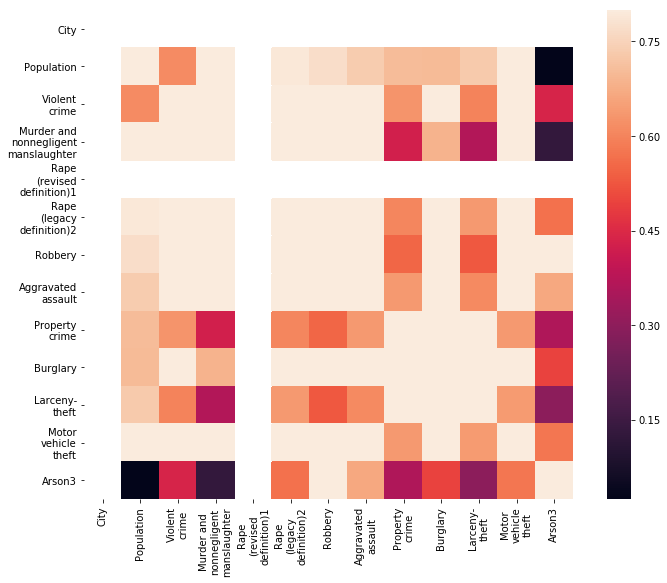

In [14]:
# Make the correlation matrix.
corrmat = crime_raw.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


### I also want to examine my features correlation. 

                    robbery  murder  population  population_squared
robbery               1.000   0.315       0.064               0.044
murder                0.315   1.000       0.162               0.133
population            0.064   0.162       1.000               0.998
population_squared    0.044   0.133       0.998               1.000


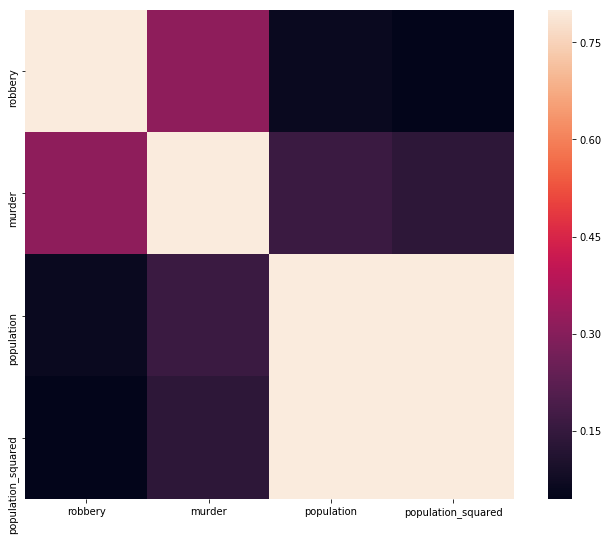

In [79]:
# Make the correlation matrix.
corrmat2 = features.corr()
print(corrmat2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


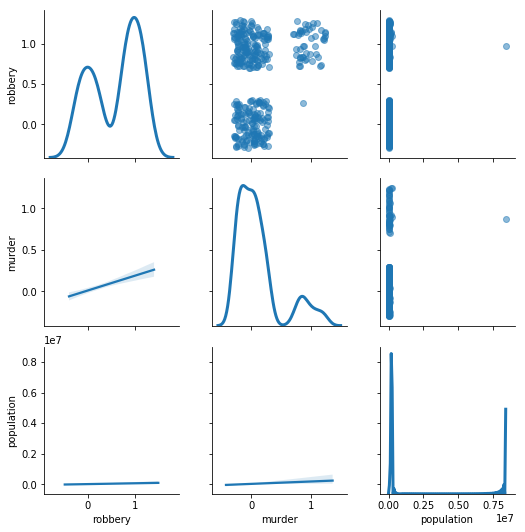

In [16]:
# Make a copy of the data to add jitter to and plot.
df_jittered = features.loc[:, 'robbery':'population'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [94]:
features.describe()

,robbery,murder,population,population_squared
count,351.000,351.000,351.000,351.000
mean,0.595,0.140,40034.704,201828335372.353
std,0.492,0.347,448104.486,3762691577605.513
min,0.000,0.000,526.000,276676.000
25%,0.000,0.000,3010.500,9063112.500
50%,1.000,0.000,7411.000,54922921.000
75%,1.000,0.000,19324.500,373436342.500
max,1.000,1.000,8396126.000,70494931807876.000


In [93]:


# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_raw['Property\ncrime'].values.reshape(-1, 1)
X = features[['murder', 'robbery', 'population']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').